# Analysis of Terrorist Attacks in the World from Janurary - June 2021


In the rapid pace of the 21st century, more people are absorbing vast amount of information in a fast manner.

Social media platforms can manipulate a person maliciously via tactically, crafted algorithms.

This results in consequences such as people forming echo chambers within their own social media space, eventually leading to radicalization.

Unfortunately, the risk of terrorist attacks because of extreme ideology are likely to increase.

To prevent this, one must be able to analyze the trends and types of attacks throughout past data in order to predict the future. This dataset aims to conduct an exploratory data analysis and observe common types of terrorist attacks done throughout the months of January to June in 2021.

In the future, this analysis will be optimistic for national security agencies and Department of Defense to better predict future threats and save American lives.

First we will read in the data as followed

In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel("globalterrorismdb_2021Jan-June_1222dist.xlsx")

In [2]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaT,60,Egypt,10,...,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaT,92,India,6,...,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaT,228,Yemen,10,...,There is doubt that this incident meets terror...,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...","""Five women killed in Yemen wedding attack,"" G...",START Primary Collection,0,0,0,0,NaN
3,202101010009,2021,1,1,NaN,0,NaT,4,Afghanistan,6,...,There is doubt that this incident meets terror...,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...","""Afghanistan: 2021 Begins with Assassination o...",START Primary Collection,-9,-9,0,-9,NaN
4,202101010024,2021,1,2,NaN,0,NaT,182,Somalia,11,...,NaN,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...","""Al-Shabab claims killing regional MP in south...",START Primary Collection,0,0,0,0,NaN


Under Codebook.pdf, there are variables that further describe each variable. I am interested in exploring the following variables (I will rename these variables to a readable dataset for working)

1. **"eventid"-** where the first 8 numbers contains the year, month, and date where it was recorded in the format "yyyymmdd".
2. **"crit1"-** Which describes the first criteria: If the terrorist attack is aimed upon achieveing a political, economic, religious, or social goal. (1 = Yes, 0=No)
3. " **crit2"-** evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. (1 = Yes, 0=No)
4. " **crit 3"-** The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants (1 = Yes, 0=No)
5. " **country_txt"-** Country where the attack was conducted
6. " **attacktype1\_txt"**- Type of Terrorist Attack
7. " **weaptype1\_txt"-** Type of Weapon used in the Terrorist Attack
   - i.e if it was explosives, firearms, etc.
8. " **weapsubtype1\_txt"-** subtype of Weapon used in the Terrorist Attack
  - i.e if it was improvised explosive, sticky bomb, etc
9. " **targtype1\_txt"-** The target/victim type field captures the general type of target/victim.
10. " **gname"-** The terrorist organization that conducted the attack
11. " **nkill" –** Number of fatalities

In [3]:
## select variables listed above 
variables= ['eventid', 'crit1','crit2', 'crit3', 'country_txt','attacktype1_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'targtype1_txt' , "gname", "nkill"]

df= data[variables]  

df

,eventid,crit1,crit2,crit3,country_txt,attacktype1_txt,weaptype1_txt,weapsubtype1_txt,targtype1_txt,gname,nkill
0,202101010004,1,1,0,Egypt,Bombing/Explosion,Explosives,Remote Trigger,Military,Unknown,2.0
1,202101010005,1,1,1,India,Bombing/Explosion,Explosives,Grenade,Police,Unknown,0.0
2,202101010006,1,1,1,Yemen,Bombing/Explosion,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Houthi extremists (Ansar Allah),5.0
3,202101010009,1,1,1,Afghanistan,Assassination,Firearms,Unknown Gun Type,Journalists & Media,Unknown,1.0
4,202101010024,1,1,1,Somalia,Assassination,Explosives,Sticky Bomb,Government (General),Al-Shabaab,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4955,202106300023,1,1,1,Afghanistan,Bombing/Explosion,Explosives,Unknown Explosive Type,Utilities,Unknown,0.0
4956,202106300029,1,1,1,Myanmar,Hostage Taking (Kidnapping),Unknown,NaN,Educational Institution,Unknown,1.0
4957,202106300030,1,1,1,Nigeria,Hostage Taking (Kidnapping),Firearms,Unknown Gun Type,Religious Figures/Institutions,Boko Haram,0.0
4958,202106300038,1,1,1,Colombia,Bombing/Explosion,Explosives,Unknown Explosive Type,Unknown,Revolutionary Armed Forces of Colombia (FARC) ...,0.0


For the ease of learning, I will define a terrorist attack as datapoint where `crit1`, `crit2`, and `crit3` all equal to 1. Therefore, I will filter out the dataset

In [4]:
mask= (df['crit1'] ==1)  &  (df['crit2']== 1) & (df['crit3']==1)

new_df=df[mask].drop(columns= ['crit1','crit2','crit3'])
new_df.columns= ['date','country','attack_type','weapon_type','weapon_subtype','target_type','terror_group_name','killed']
new_df

,date,country,attack_type,weapon_type,weapon_subtype,target_type,terror_group_name,killed
1,202101010005,India,Bombing/Explosion,Explosives,Grenade,Police,Unknown,0.0
2,202101010006,Yemen,Bombing/Explosion,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Houthi extremists (Ansar Allah),5.0
3,202101010009,Afghanistan,Assassination,Firearms,Unknown Gun Type,Journalists & Media,Unknown,1.0
4,202101010024,Somalia,Assassination,Explosives,Sticky Bomb,Government (General),Al-Shabaab,1.0
5,202101010025,India,Bombing/Explosion,Explosives,Grenade,Police,Unknown,0.0
...,...,...,...,...,...,...,...,...
4955,202106300023,Afghanistan,Bombing/Explosion,Explosives,Unknown Explosive Type,Utilities,Unknown,0.0
4956,202106300029,Myanmar,Hostage Taking (Kidnapping),Unknown,NaN,Educational Institution,Unknown,1.0
4957,202106300030,Nigeria,Hostage Taking (Kidnapping),Firearms,Unknown Gun Type,Religious Figures/Institutions,Boko Haram,0.0
4958,202106300038,Colombia,Bombing/Explosion,Explosives,Unknown Explosive Type,Unknown,Revolutionary Armed Forces of Colombia (FARC) ...,0.0


Now lets reformat the date to yy/mm/dd. First, we know that the first 8 characters of `date` is the year, so we can slice them. The `date` column will be string for now

In [5]:
new_df['date']=new_df['date'].astype(str)

new_df['date']=new_df['date'].str.slice(stop=8)
new_df['date']= pd.to_datetime(new_df['date'], format='%Y%m%d')

new_df

,date,country,attack_type,weapon_type,weapon_subtype,target_type,terror_group_name,killed
1,2021-01-01,India,Bombing/Explosion,Explosives,Grenade,Police,Unknown,0.0
2,2021-01-01,Yemen,Bombing/Explosion,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Houthi extremists (Ansar Allah),5.0
3,2021-01-01,Afghanistan,Assassination,Firearms,Unknown Gun Type,Journalists & Media,Unknown,1.0
4,2021-01-01,Somalia,Assassination,Explosives,Sticky Bomb,Government (General),Al-Shabaab,1.0
5,2021-01-01,India,Bombing/Explosion,Explosives,Grenade,Police,Unknown,0.0
...,...,...,...,...,...,...,...,...
4955,2021-06-30,Afghanistan,Bombing/Explosion,Explosives,Unknown Explosive Type,Utilities,Unknown,0.0
4956,2021-06-30,Myanmar,Hostage Taking (Kidnapping),Unknown,NaN,Educational Institution,Unknown,1.0
4957,2021-06-30,Nigeria,Hostage Taking (Kidnapping),Firearms,Unknown Gun Type,Religious Figures/Institutions,Boko Haram,0.0
4958,2021-06-30,Colombia,Bombing/Explosion,Explosives,Unknown Explosive Type,Unknown,Revolutionary Armed Forces of Colombia (FARC) ...,0.0


Step 1 : Lets start by looking at the countries with the most and least terrorist attacks. We will do the 10 largest, breaking any ties that are found and sorting country by alphabetical order if there are ties

In [6]:
country_terr_attks= new_df.groupby('country').size().reset_index() 
country_terr_attks.columns= ['country','num_terr_attks']

largest= country_terr_attks.nlargest(10, 'num_terr_attks', keep='all').sort_values(by=['num_terr_attks','country'],ascending= [False, True] ).reset_index(drop=True)
largest

,country,num_terr_attks
0,Afghanistan,1076
1,Nigeria,376
2,Iraq,335
3,India,214
4,Yemen,205
5,Myanmar,179
6,Democratic Republic of the Congo,122
7,Syria,111
8,Pakistan,107
9,Israel,93


In [7]:
smallest= country_terr_attks.nsmallest(10, 'num_terr_attks', keep='all').sort_values(by=['num_terr_attks','country'], ascending= [False,True])
smallest

,country,num_terr_attks
1,Albania,1
2,Algeria,1
4,Australia,1
7,Benin,1
20,El Salvador,1
25,Ghana,1
27,Guatemala,1
37,Latvia,1
38,Lebanon,1
41,Maldives,1


Of those top 10 terror attacks, lets see what is the most common type of weapon used. For the top countries that are likely to have terroist attacks, we want to see what weapon types terroists commonly used and their subtypes. We will investigate the top 10 most common weapon types terrorists use to conduct their attacks. We will break ties to keep all elements, and sort country  by alphabetical order. We are going to include the date to see when the terrorist attack happened

In [8]:
country_terr_attks_weap_type= new_df.groupby(['date','country','weapon_type' ,'weapon_subtype']).size().reset_index()
country_terr_attks_weap_type.columns= ['date','country','weapon_type' ,'weapon_subtype', 'count']
country_terr_attks_weap_type_df= country_terr_attks_weap_type.nlargest(10,'count',keep='all').sort_values(by=['count','country'], \
                     ascending= [False,True]                             ).reset_index(drop=True)                                                                   
country_terr_attks_weap_type_df

,date,country,weapon_type,weapon_subtype,count
0,2021-04-29,Nigeria,Firearms,Unknown Gun Type,23
1,2021-05-15,Israel,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",17
2,2021-05-19,Israel,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",14
3,2021-06-28,Myanmar,Explosives,Unknown Explosive Type,13
4,2021-06-16,Iraq,Explosives,Unknown Explosive Type,12
5,2021-06-06,Mexico,Firearms,Unknown Gun Type,10
6,2021-05-11,Israel,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",9
7,2021-06-17,Nigeria,Firearms,Unknown Gun Type,9
8,2021-05-13,Afghanistan,Explosives,Landmine,8
9,2021-04-06,Nigeria,Firearms,Unknown Gun Type,8


Lets explore something else. Lets see the top 10 targets for terroist attacks

In [9]:
popular_terr_loc= new_df.groupby(['target_type']).count().reset_index().iloc[:,:2]

popular_terr_loc.columns=['target_type','count']

popular_terr_loc_df= popular_terr_loc.nlargest(10,'count').reset_index(drop=True)
popular_terr_loc_df

,target_type,count
0,Private Citizens & Property,1462
1,Police,650
2,Government (General),513
3,Business,239
4,Unknown,176
5,Terrorists/Non-State Militia,138
6,Military,108
7,Utilities,95
8,Religious Figures/Institutions,83
9,Educational Institution,75


Of those top 10 places terrorists like to target, lets see what type of weapons they like to use. I'm going to use weapon subtype to be a LITTLE more detail in the type of weapon they use. We are going to include the date of when the terrorist attack happened

In [10]:
## Lets make an nlargest fxn because I want to use this output of the dataframe for something else
def nlargest(df):
    return df.nlargest(10,'count')

In [11]:
weap_type_used= new_df.groupby(['target_type','weapon_subtype' ]).size().reset_index()
weap_type_used.columns= ['target_types','weapon_types','count']
weap_type_used=weap_type_used.sort_values('count', ascending=False)
weap_type_used_df = nlargest(weap_type_used).reset_index(drop=True)
weap_type_used_df

,target_types,weapon_types,count
0,Private Citizens & Property,Unknown Gun Type,509
1,Private Citizens & Property,"Projectile (rockets, mortars, RPGs, etc.)",211
2,Government (General),Unknown Gun Type,210
3,Police,Unknown Gun Type,192
4,Private Citizens & Property,Unknown Explosive Type,120
5,Police,Unknown Explosive Type,76
6,Private Citizens & Property,Landmine,73
7,Utilities,Unknown Explosive Type,69
8,Unknown,Unknown Explosive Type,68
9,Government (General),Unknown Explosive Type,64


Now lets see which terror groups conduct the most terror attacks throughout the period of Jan-June 2021. 

In [12]:
terr_org= new_df.groupby(['terror_group_name']).size().reset_index() 
terr_org.columns=(["terror_group_name",'count'])
terr_orgs_df= terr_org.sort_values(by='count',ascending=False).reset_index(drop=True)
terr_orgs_df

,terror_group_name,count
0,Unknown,1456
1,Taliban,643
2,Houthi extremists (Ansar Allah),223
3,Fulani extremists,164
4,Islamic State of Iraq and the Levant (ISIL),150
...,...,...
163,National Liberation Front (FNL) (Burundi),1
164,Baloch Republican Guards (BRG),1
165,National Democratic Alliance Army (NDAA-ESSA),1
166,Celulas Revolucionarias Nicolas Neira,1


We see that the majority of terror acts conducted from the period of Jan to June 2021 are from Unknown groups... lets see what common weapons these groups use to conduct terrorist attacks

In [13]:
terr_grps= new_df.groupby(['terror_group_name', 'weapon_subtype']).size().reset_index() 
terr_grps.columns= ['terror_group', 'weapon_type', 'count']

terr_grps_df= terr_grps.sort_values(by=['count'], ascending=False).reset_index(drop=True)
terr_grps_df

,terror_group,weapon_type,count
0,Unknown,Unknown Gun Type,455
1,Unknown,Unknown Explosive Type,342
2,Taliban,Unknown Gun Type,144
3,Fulani extremists,Unknown Gun Type,132
4,Houthi extremists (Ansar Allah),"Projectile (rockets, mortars, RPGs, etc.)",108
...,...,...,...
416,Jamaah Ansharut Daulah,Unknown Explosive Type,1
417,Jamaah Ansharut Daulah,Suicide (carried bodily by human being),1
418,Jaish-e-Mohammad (JeM),Unknown Explosive Type,1
419,Jaish-e-Mohammad (JeM),Automatic or Semi-Automatic Rifle,1


There seems to be a lot of unknown weapons types. I am going to take a more defined approach to this problem

Let's see what are the top 10 known terror groups that conducted terror acts and of those known groups, what weapons do they use?

In [14]:
no_unk_terr_grps_guns = terr_grps_df[(~terr_grps_df['weapon_type'].str.match("Unknown")) & (~terr_grps_df['terror_group'].str.match("Unknown"))]

In [15]:
no_unk_terr_grps_guns = terr_grps_df[(~terr_grps_df['weapon_type'].str.match("Unknown")) & (~terr_grps_df['terror_group'].str.match("Unknown"))]


no_unk_terr_grps_guns.nlargest(10,'count').reset_index(drop=True)


,terror_group,weapon_type,count
0,Houthi extremists (Ansar Allah),"Projectile (rockets, mortars, RPGs, etc.)",108
1,Houthi extremists (Ansar Allah),Remote Trigger,62
2,Taliban,Landmine,53
3,Hamas (Islamic Resistance Movement),"Projectile (rockets, mortars, RPGs, etc.)",47
4,Taliban,Vehicle,37
5,Taliban,"Projectile (rockets, mortars, RPGs, etc.)",33
6,Al-Shabaab,Landmine,19
7,Fulani extremists,Automatic or Semi-Automatic Rifle,18
8,Khorasan Chapter of the Islamic State,Sticky Bomb,16
9,Indigenous People of Biafra (IPOB),Automatic or Semi-Automatic Rifle,15


Now lets plot some timeseries analyzing the number of attacks and deaths. We need to do some preparing of our dataset. First we need to group by how many terrorist attacks happened on each date, and then find out how many people were killed

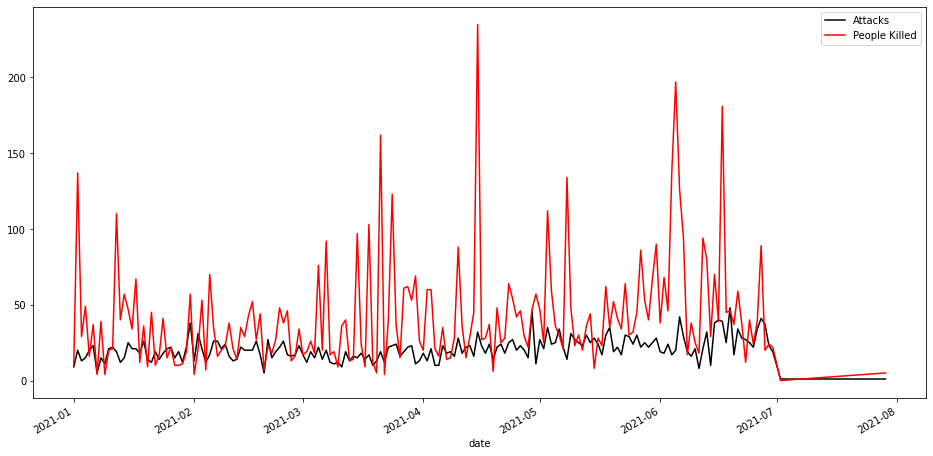

In [16]:
import matplotlib.pyplot as plt

ts_data=new_df.groupby(['date']).count().reset_index()
new_df_killed= new_df[['date','killed']].fillna(0)
ts_data_killed=new_df_killed.groupby(['date']).sum('killed').reset_index()
ts_data= ts_data.iloc[:,0:2]

ts_data=ts_data.merge(ts_data_killed,on='date')
ts_data.columns= ['date', 'attacks', 'killed']


ts_data= ts_data.set_index('date')
plt.figure(figsize=(16, 8))

ts_data['attacks'].plot(label='Attacks', color='black') 
ts_data['killed'].plot(label='People Killed',color='red') 

plt.legend() 


Interesting. It looks like there is a spike between 2021-04 and 2021-05, I wonder what that spike is that.. maybe its an outlier? Lets take a look.

In [17]:
mask = (new_df['date'] > '2021-04-01') & (new_df['date'] <= '2021-05-01')
new_df[mask].nlargest(10,'killed').head()

,date,country,attack_type,weapon_type,weapon_subtype,target_type,terror_group_name,killed
3180,2021-04-15,Ethiopia,Armed Assault,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Oromo Liberation Front,50.0
3181,2021-04-15,Ethiopia,Armed Assault,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Oromo Liberation Front,50.0
3182,2021-04-15,Ethiopia,Armed Assault,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Oromo Liberation Front,50.0
3183,2021-04-15,Ethiopia,Armed Assault,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Private Citizens & Property,Oromo Liberation Front,50.0
811,2021-04-10,Yemen,Armed Assault,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Military,Houthi extremists (Ansar Allah),48.0


At first, you may think this is an outlier. But turns out it is not an outlier. The reason why it is not an outlier is because this terrorist attack occured in 3 different cities and locations. Lets use the original dataset to explain

In [18]:
# mask2 = (df['gname'] == 'Oromo Liberation Front') & (df['gname'].str.match("20210415"))
mask2 = (data['eventid'].astype(str).str.match("20210415")) &(data['gname'] == 'Oromo Liberation Front')

diagnostic_df= data[mask2] 
diagnostic_df[['eventid', 'city','gname','nkill' ]] ## different city

,eventid,city,gname,nkill
3180,202104150043,Ataye,Oromo Liberation Front,50.0
3181,202104150044,Alalay,Oromo Liberation Front,50.0
3182,202104150045,Kara Kore,Oromo Liberation Front,50.0
3183,202104150046,Yimlu,Oromo Liberation Front,50.0


So the moral of the story here, if you manipulate the original dataset, you might introduce what you THINK might be outliers but in reality, it is not because you may have threw out other columns that made the entry unique!

Lets see the ratio between terror attacks conducted and number of people killed. For this, we will use the ratio killed:attacks where we see how many people are killed per terrorist attack. First, we will make a column called killed/attack to measure how many people are killed per terrorist attack 

In [19]:
ratio=round(sum(ts_data['killed'])/sum(ts_data['attacks']),3)
ratio

2.024

Seems on average 2.024 people are killed per terrorist attack. An unfortuante case

I am interested in finding certain types of trends amongst terror attacks. Since we have a data of number of attacks and number of people killed, lets see if we can discover some potential labels that were not yet discovered by the original dataset.

Perhaps we can discover more trends amongst terror attacks based on the number of terrorist attacks occuring and the number of people killed. 

We are going to implement the clustering algorithim using the `ts_data` (which we will rename it to `analysis_df`). 

To make our lives easier, lets import the functions we made in Notebook 14 for K means clustering and scale the `analysis_df` data using our `standardization` function.

In [20]:
def init_centers(X, k):
    """
    Randomly samples k observations from X as centers.
    Returns these centers as a (k x d) numpy array.
    """
    centers_matrix = X[np.random.choice(len(X), k, replace=False)]
    return centers_matrix
def compute_d2(X, centers): 
    distance2 = np.sqrt(np.sum((X[:,None,:] - centers[None,:,:]) ** 2, axis=2))**2 
    return distance2


def assign_cluster_labels(S): 
    return np.argmin(S, axis=1)

def update_centers(X, y):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    assert m == len(y)
    assert (min(y) >= 0)
    
    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        centers[j,:]= np.mean(X[j==y,:], axis=0)

    return centers

def WCSS(S):
    return np.sum(np.amin(S,axis=1))


def has_converged(old_centers,centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])


def kmeans(X, k,
           starting_centers=None,
           max_steps=np.inf):
    if starting_centers is None:
        centers = init_centers(X, k)
    else:
        centers = starting_centers
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_centers = centers
        S = compute_d2(X, centers)
        labels = assign_cluster_labels(S)
        centers = update_centers(X, labels)
        converged = has_converged(old_centers, centers)
        

        print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    return labels



Now lets scale the values then apply the functions we imported from NB 14 to our dataset. Lets use `K`= 3 clusters for our example ML algorithm

iteration 1 WCSS =  297.49294678808167
iteration 2 WCSS =  186.09310306108642
iteration 3 WCSS =  181.13842393032783
iteration 4 WCSS =  175.52145930471696
iteration 5 WCSS =  168.9807019592186
iteration 6 WCSS =  161.1323068924787
iteration 7 WCSS =  157.13574439957506
iteration 8 WCSS =  152.93852493115074
iteration 9 WCSS =  147.5290517541062
iteration 10 WCSS =  147.095716455569
iteration 11 WCSS =  146.80576398561627
iteration 12 WCSS =  146.70507984717432
iteration 13 WCSS =  146.6853964093907


Text(0.5, 0, '# of Persons Killed')

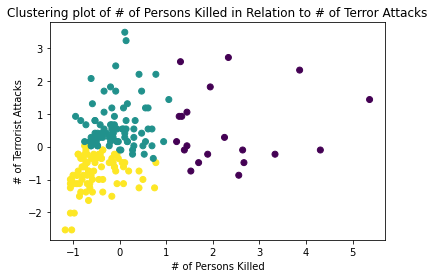

In [21]:
def standardization(df, column_name):
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()
    df[column_name] = (df[column_name] - mean_value) / std_value
    
analysis_df= ts_data
standardization(analysis_df,'attacks')
standardization(analysis_df,'killed')

X_matrix=analysis_df[['attacks','killed']].values

clustering=kmeans(X_matrix, 3)

ts_data['clustering']=clustering
centers=update_centers(X_matrix,clustering)

plt.scatter(ts_data['killed'],ts_data['attacks'],c=clustering)
plt.title("Clustering plot of # of Persons Killed in Relation to # of Terror Attacks")
plt.ylabel("# of Terrorist Attacks")
plt.xlabel("# of Persons Killed")

Seems that we can cluster the number of terrorist attacks and people killed based on serverity. We can see that the algorithm clustered points where
1. There are low terror attacks and low victims,

2. Low terror attacks and high victims, and;

3. A wide variability of high/low terror attacks and large number of victims

## Conclusion

Based on the analysis and all the graphs outputted, we can visualize that lethal terror attacks in 2021 happened to occur between Spring and early summer.

Furthermore, the most common weapons we see used in terror attacks are Projectiles, Remote Detonators (possibly for Improvised Explosives), and Landmines

We also see that Private Citizens/Property, Governments, and Police were the most targeted group in 2021.

We also saw that the countries there were most vulnerable to terror attacks were Afghanistan, Nigeria, Iraq, and India, and so forth.

Houthi Extremists, Hamas, and Taliban were the most common terror groups conducting this attack.



### Issues
Problems I found were repeating values (such as the Oromo Liberation Front). It is important to double check the original dataset when jumping to conclusions in detecting outliers.   

Initially, I thought that they were just repeating values, but then after checking the original dataset, I realized that these attacks were occuring in different areas of the city. Therefore, the moral of the story is to check your original datasets before jumping into conclusions. Another issue I was faced with was dealing with Unknown data. 

As seen in the table, Unkown values contribute to most of the terror attacks. Therefore, further analysis of the type of weapon or the name of the terror group may skew results. It is important to note this in order to prevent misleading results

### Suggestions for Future Research 

Some suggestions could be 

-  Implementing a multi classification algorithim to classify diffrent type of weapons used (there many weapon types to classify, a binary response factor would not be appropriate)


-  Doing a time-series forecast with exponential smoothing on predicting future terrorist attacks and deaths.


- Creating a community graph/ network using `networkx` to find associated terrorist groups. We can use the date of attack to measure the strength of the relationship between two groups and see associations
    -  We can use a theory to conclude the more closer to the date the more related (this is just a theory, professionals from the industry might have different factors)
    
    

### Source: 
START (National Consortium for the Study of Terrorism and Responses to Terrorism). (2021). Global Terrorism Database (GTD) [Data set]. University of Maryland. https://www.start.umd.edu/gtd
    
START (National Consortium for the Study of Terrorism and Responses to Terrorism). (2021, August). Global Terrorism Database codebook: Methodology, inclusion criteria, and variables. University of Maryland. https://www.start.umd.edu/gtd/downloads/Codebook.pdf